<a href="https://colab.research.google.com/github/parjanyahk/camCalibOpenCV/blob/main/cam_calib_OCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import statements
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import glob

In [2]:
# Dimensions of the checkerboard
chkrbrd = (6, 8)

In [3]:
# To stop the iteration when specified number of iterations are completed or specified accuracy is reached
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [4]:
# Vector for 3D points
vect_3D_pts = []

# Vector for 2D points
vect_2D_pts = []

In [5]:
# 3D points real world coord
objectp3d = np.zeros((1, chkrbrd[0] * chkrbrd[1], 3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:chkrbrd[0], 0:chkrbrd[1]].T.reshape(-1, 2)

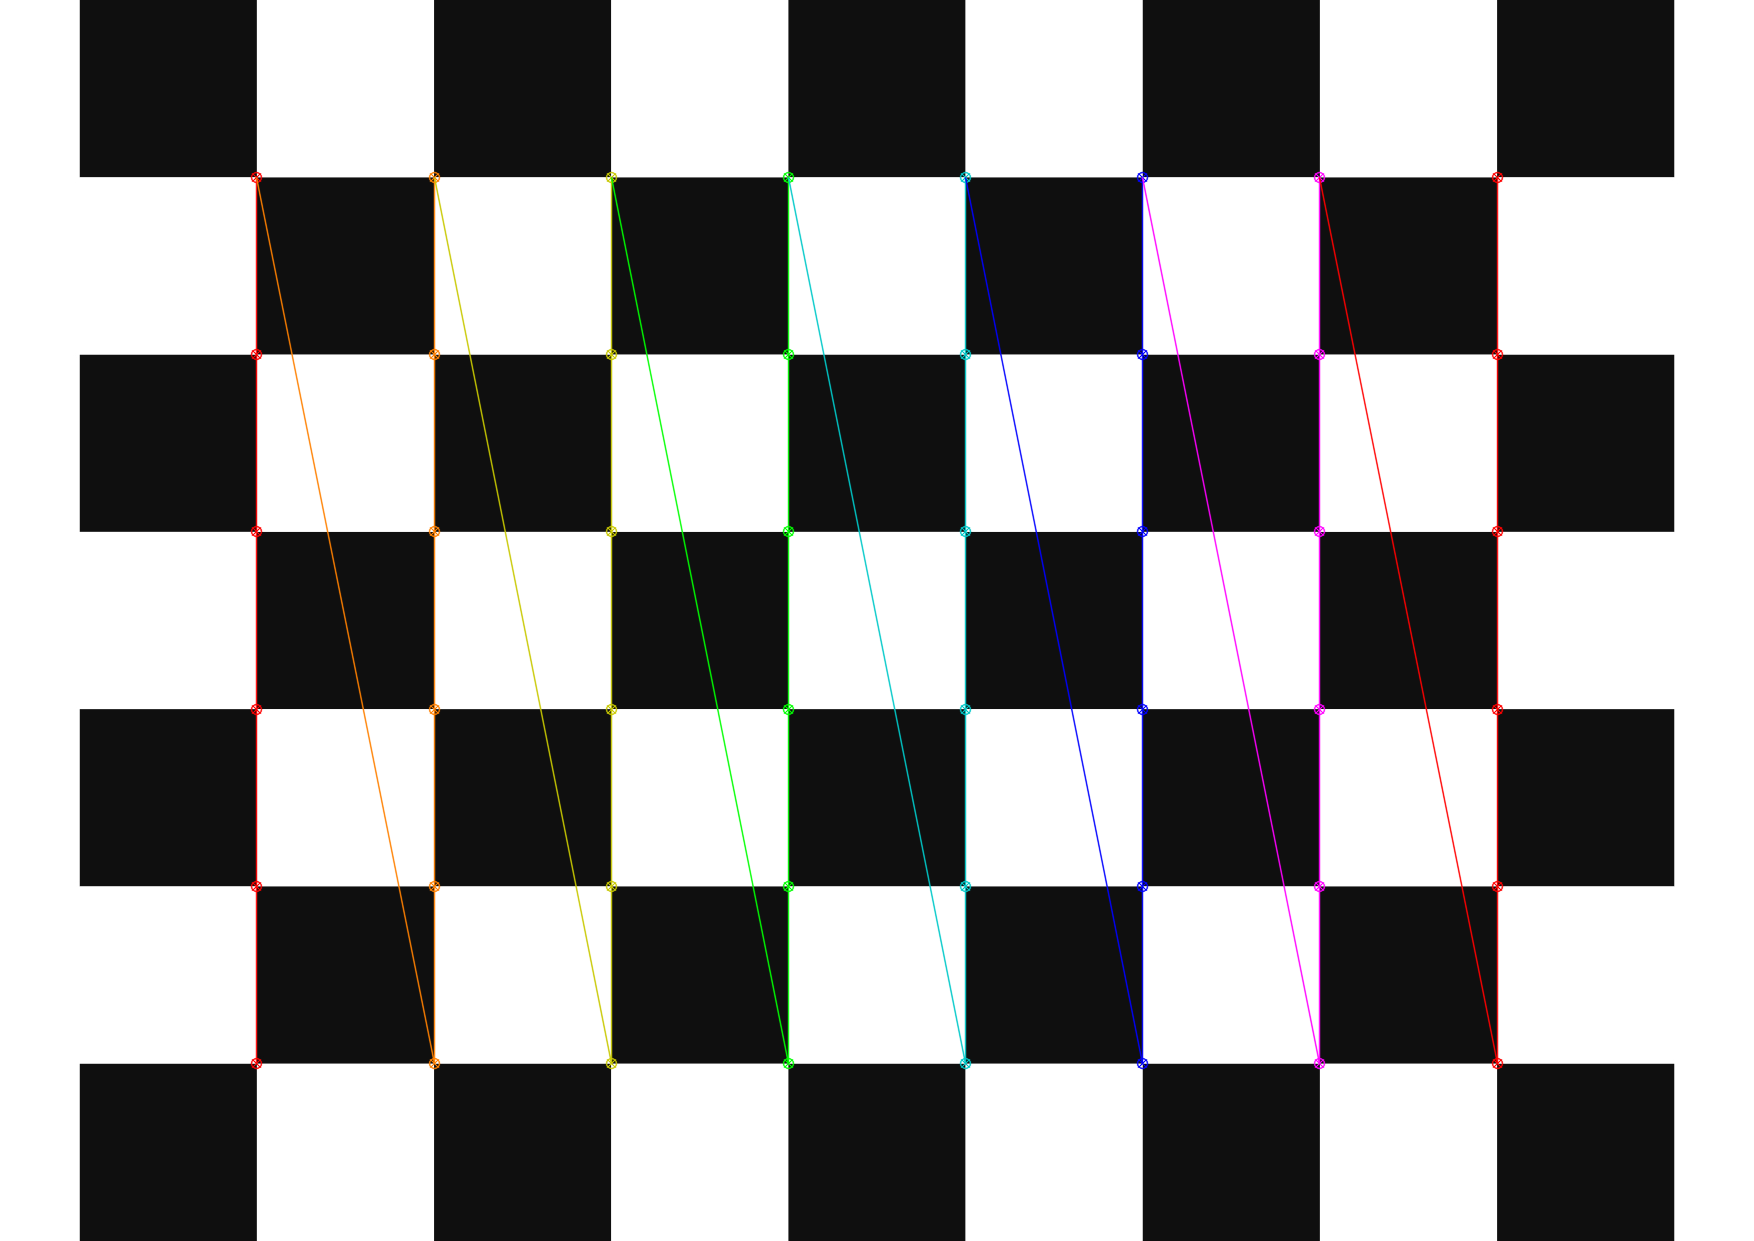

In [13]:
# Path of image stored here it is the pwd
images = glob.glob('*.jpg')

for fname in images:
	image = cv2.imread(fname)
	grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	# Find the chess board corners,
	# If desired number of corners are found in the image then ret = true
	ret, corners = cv2.findChessboardCorners(grayColor, chkrbrd, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK 
                                          + cv2.CALIB_CB_NORMALIZE_IMAGE)

	'''If desired number of corners can be detected then,
	refine the pixel coordinates and display them on the images of checker board'''
	if ret == True:
		vect_3D_pts.append(objectp3d)

		# Refining, extracting pixel coordinates for given 2d points.
		corners2 = cv2.cornerSubPix(grayColor, corners, (11, 11), (-1, -1), criteria)

		vect_2D_pts.append(corners2)

		# Draw and display the corners
		image = cv2.drawChessboardCorners(image, chkrbrd, corners2, ret)
	cv2_imshow(image)
	cv2.waitKey(0)

cv2.destroyAllWindows()

h, w = image.shape[:2]

In [7]:
''' Perform camera calibration by passing the value of above found out 3D points (vect_3D_pts) 
 and its corresponding pixel coordinates of the detected corners (vect_2D_pts)'''
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(vect_3D_pts, vect_2D_pts, grayColor.shape[::-1], None, None)


# Displaying output
print(" Camera Matrix:")
print(matrix)

print("\n Distortion Coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)

 Camera Matrix:
[[1.89568341e+04 0.00000000e+00 3.78012018e+02]
 [0.00000000e+00 1.89677602e+04 6.25521828e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion Coefficient:
[[ 7.01408298e-01 -1.00249037e+02  5.38118725e-06 -1.00495311e-04
   1.96601664e-01]]

 Rotation Vectors:
(array([[ 0.01084087],
       [-0.01086014],
       [-1.57077046]]),)

 Translation Vectors:
(array([[ -0.68637384],
       [  2.4686975 ],
       [107.02470367]]),)


In [ ]:
''' 
References:
[1] Camera Calibration Documentation - https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html
[2] Camera Calibration Theory - https://learnopencv.com/camera-calibration-using-opencv/
'''